In [1]:
import pandas as pd
%matplotlib inline

In [2]:
def parse_dollars(dollars_str):
    assert dollars_str[0] == '$'
    return float(dollars_str[1:])

In [3]:
d = pd.read_csv('amazon.csv', parse_dates=['Order Date'], index_col='Order Date',
               converters={
        'Item Subtotal': parse_dollars,
        'Item Total': parse_dollars,
    })
d.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 300 entries, 2009-04-25 to 2016-02-18
Data columns (total 35 columns):
Order ID                          300 non-null object
Title                             300 non-null object
Category                          279 non-null object
ASIN/ISBN                         300 non-null object
UNSPSC Code                       256 non-null float64
Website                           300 non-null object
Release Date                      121 non-null object
Condition                         300 non-null object
Seller                            300 non-null object
Seller Credentials                1 non-null object
List Price Per Unit               300 non-null object
Purchase Price Per Unit           300 non-null object
Quantity                          300 non-null int64
Payment Instrument Type           300 non-null object
Purchase Order Number             0 non-null float64
PO Line Number                    0 non-null float64
Ordering Custome

In [4]:
ts = d[['Item Subtotal', 'Item Total']].copy()
ts['year'] = ts.index.year
tsby = ts.groupby('year').sum()
tsby

,Item Subtotal,Item Total
year,,
2009,166.07,166.07
2010,34.94,34.94
2011,270.32,270.32
2012,1730.77,1822.05
2013,2746.60,2908.60
2014,1936.17,2048.03
2015,6240.86,6664.90
2016,872.88,914.05


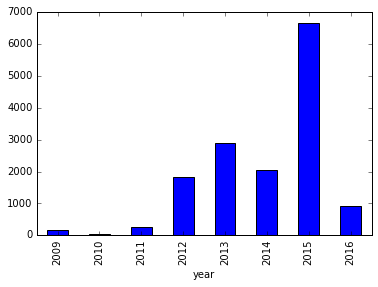

In [5]:
tsby['Item Total'].plot(kind='bar')